In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/TFM /TFM

In [38]:
%cd /TFM

/content/gdrive/My Drive/TFM


In [62]:

# Python code to
# demonstrate readlines()

 
# Using readlines()
file1 = open('labels_1104.txt', 'r')
Lines = file1.readlines()
print(type(Lines))
clean = []
dict_objs = {}
count = 0
for line in Lines:
  if not line.isspace() and  not ("cvWriteFrame" in line) and not ("AVG_FPS" in line) and not ("Loaded" in line) and not ("seen" in line) and not ("FPS:" in line):#line != " cvWriteFrame":
    if "Object" in line:
      count += 1      
    clean.append(str(count)+ " "+line)

with open('/TFM/clean.txt', 'w') as f:
  for line in clean[11:]:
    if not "Objects:" in line:
      f.writelines(line)

# Strips the newline character

objects_pos = []
for line in clean[11:len(clean)]:#
    if not ("Objects:" in line):
      all = line.split(" ")
      #print(all)
      if all[7] == '(left_x:':
        print((int(all[0]), all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
        objects_pos.append((int(all[0]), all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
        dict_objs[int(all[0])].append((all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
      
      else:
        if 
        print((int(all[0]), all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))
        objects_pos.append((int(all[0]), all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))
        dict_objs[int(all[0])].append((all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))

      
      

<class 'list'>
(2, 'cup', 103, 291, 45, 62)


KeyError: ignored

In [60]:
print(dict_objs.get(2520))

('cup', 153, 276, 41, 81)


/content/gdrive/My Drive/mask_test_videos
numero total de frames: 2548
numero frames/sec: 29
(117, 244)


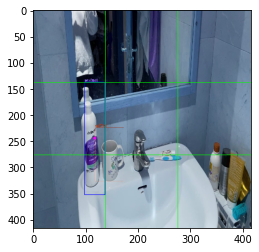

'ret, frame = cap.read()\ncv2_imshow(frame)\n#cv2.imshow("Video", frame)\nif cv2.waitKey(20) & 0xFF == ord(\'q\'):\n    break\n\ncv2.destroyAllWindows()'

In [36]:

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


%cd //content/gdrive/My\ Drive/mask_test_videos/

video_path = "result_1104.avi"
myFrameNumber = 2537

# capture the video
cap = cv2.VideoCapture(video_path)
i = 0  # frame index to save frames

#----------AJUSTE DE FRAMES----------
# conteo del número total de frames en el video
total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('numero total de frames: %d' % total)
# conteo del número de frames por segundo en el vídeo
fps = int(cap.get(cv2.CAP_PROP_FPS))
print('numero frames/sec: %d' % fps)

cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber)
ret, frame = cap.read()
frame = cv2.resize(frame, (416, 416))

x, y, w, h = (147, 275, 54, 102)
x, y, w, h = (118, 245, 39, 215)

l = int((x - w / 2))
r = int((x + w / 2))
t = int((y - h / 2))
b = int((y + h / 2))


frame = cv2.rectangle(frame, (l, t), (r, b), (0, 0, 255), 1)
frame = cv2.circle(frame, (int((r-l)/2)+l,int((b-t)/2)+t), radius=1, color=(255, 0, 255), thickness=3)


frame = cv2.line(frame, (tercio, 0), (tercio, 416), (0, 255, 0), thickness=1)
frame = cv2.line(frame, (tercio*2, 0), (tercio*2, 416), (0, 255, 0), thickness=1)
frame = cv2.line(frame, (0, tercio), (416, tercio), (0, 255, 0), thickness=1)
frame = cv2.line(frame, (0, tercio*2), (416, tercio*2), (0, 255, 0), thickness=1)

print((int((r-l)/2)+l,int((b-t)/2)+t))
plt.imshow(frame)
plt.show()

cv2.destroyAllWindows()
"""ret, frame = cap.read()
cv2_imshow(frame)
#cv2.imshow("Video", frame)
if cv2.waitKey(20) & 0xFF == ord('q'):
    break

cv2.destroyAllWindows()"""


In [35]:
dict_pos = {(0,0): "arriba a la izquierda", (1,0): "arriba en el centro", (2,0): "arriba a la derecha",
            (0,1): "a la izquierda", (1,1): "en el centro", (2,1): "a la derecha",
            (0,2): "abajo a la izquierda", (1,2): "abajo en el centro", (2,2): "abajo a la derecha"}
tercio = int(416/3)
def find_spot(x, y, w, h):
  l = int((x - w / 2))
  r = int((x + w / 2))
  t = int((y - h / 2))
  b = int((y + h / 2))
  (cx, cy) = (int((r-l)/2)+l,int((b-t)/2)+t)

  for x, y in dict_pos:
    if cx > tercio*x and cx <= tercio*(x+1) and cy > tercio*y and cy <= tercio*(y+1):
      return dict_pos.get((x,y))
    
    #print(dict_pos.get(x, y))
print(find_spot(118, 245, 39, 215) )

a la izquierda
